<a href="https://colab.research.google.com/github/SShalini24/Gold-Price-Prediction-/blob/main/Project7_Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [71]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings 
warnings.filterwarnings('ignore')

Data Collection and Preprocessing 

In [72]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [73]:
# print first five rows in the dataframe 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [74]:
# print last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [75]:
# number of rows and columns 
gold_data.shape

(2290, 6)

In [76]:
# getting some basic info about the data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [77]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [78]:
# getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Find the Correlation:

1.Positive Correlation

2.Negative Correlation 

In [79]:
correlation = gold_data.corr()

<Axes: >

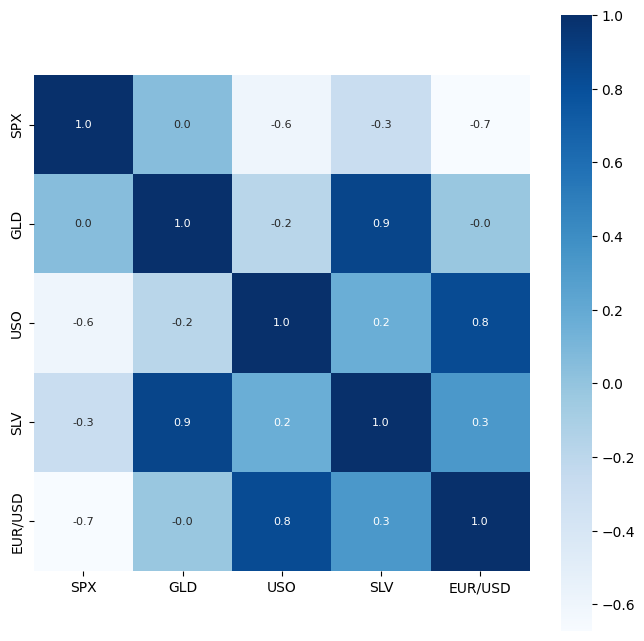

In [80]:
# constructing the heatmap to understand the correlation 
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar =True,square = True,fmt ='.1f',annot=True,annot_kws={'size':8},cmap='Blues')


In [81]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

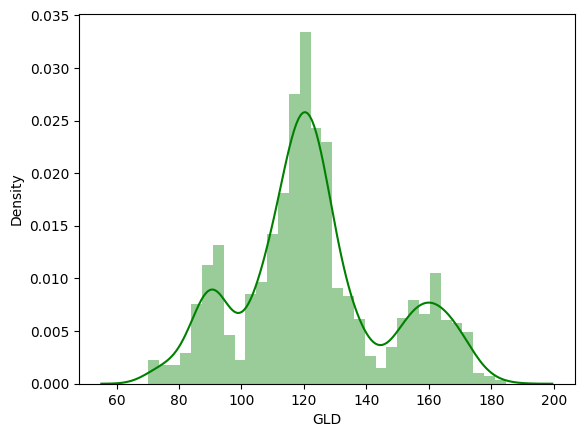

In [82]:
# checking the distribution of the goldd price
sns.distplot(gold_data['GLD'],color = 'Green')

Splitting the Features and the Target

In [83]:
x = gold_data.drop(columns =['Date','GLD'],axis=1)
y = gold_data.GLD

In [84]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [85]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Testing data

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Model Training 

Random Forest Regressor

In [87]:
regressor = RandomForestRegressor(n_estimators =100)

In [88]:
# training the model 
regressor.fit(x_train,y_train)

RandomForestRegressor()

Model Evaluation 

In [89]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)
print(test_data_prediction)

[168.67449953  82.05149987 116.04180051 127.62710057 120.68160125
 154.76779769 150.26299849 126.08820021 117.36859885 126.01350024
 116.69280086 172.30360061 141.18559821 167.77449855 115.18210033
 117.42610027 138.69670305 169.6300008  159.44490301 158.3173998
 155.28140039 125.11200014 176.6935998  157.38460466 125.34470037
  93.89289986  76.95490004 120.92699998 119.15809949 167.50679939
  87.98430038 125.4988002   91.36490079 117.69490022 121.10899887
 136.49950126 115.36800119 115.67010129 147.10159955 107.36450059
 103.92870224  87.20809802 126.51140035 117.79179997 153.58659883
 119.64840011 108.34199989 108.35229796  93.2116006  127.32699712
  75.22530007 113.62089868 121.58150015 111.10239938 118.82249895
 121.07249917 158.61370005 167.48930145 146.95469661  85.63309855
  94.31700031  86.83059882  90.65400017 118.9590008  126.47820086
 127.55840023 169.11639939 122.21639964 117.42659896  98.61420033
 168.0440018  142.98819799 132.0334021  121.20580236 121.36039919
 119.642600

In [90]:
# R2 Squared Error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R_squared Error",error_score)

R_squared Error 0.9893535213987699


Compare the Actual values and Predicted values in a Plot 

In [92]:
y_test = list(y_test)

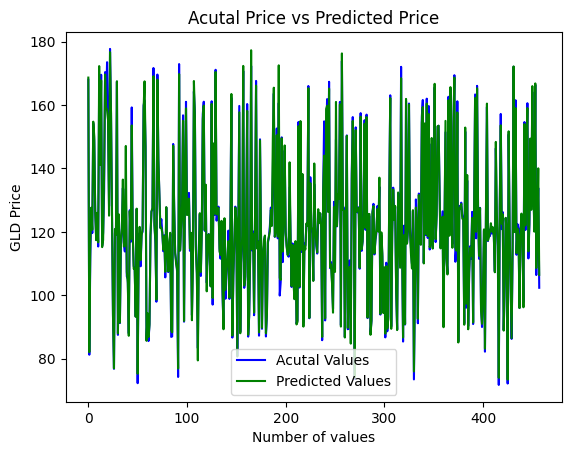

In [93]:
plt.plot(y_test,color = 'blue',label = "Acutal Values")
plt.plot(test_data_prediction,color = 'green',label = 'Predicted Values')
plt.title ("Acutal Price vs Predicted Price")
plt.xlabel("Number of values")
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
# From the above graph we can see that the values are really close.So in this case by using Random Forest Classifier we can successfuly predicted the Gold price based on severeal other stock price.